# CMSE 201 Final Project
### &#9989; Saikeertana Gubbala
### &#9989; Section_003
#### &#9989; 4/02/24

## INSTRUCTIONS FOR RUNNING THE NOTEBOOK

* The dataset used in this project is freely available at https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data, which is from CDC a reputable health data source. The name of the file when downloaded will be `Alzheimer_s_Disease_And_Healthy_Aging_Data.csv` and can be found by clicking a button next to "Comma Seperated Values File" named "Download". The files should be downloaded in the same folder as this notebook, and renamed to `alz.csv` so the code runs without any errors. 
* Ensure you are using Python 3 or higher when running the notebook.

# ___Alzheimer's risk and Demographic Disparities.___

## Background and Motivation

**Objective:** In this century, the prevalence of Alzheimer's disease presents a significant public health challenge, affecting millions of people worldwide. Infact the rate at which this disease is occuring, is increasing due to a variety of demographic factors. Despite decades of research the relationship between these factors and the disease is a pressing issue.

**Introduction:**
A simple google search on "What causes Alzheimer's disease?" shows a variety of factors that range from genetics, lifestyle and environmental factors. Rather than focusing on the genetic aspect (which is quite hard to change), there are other factors that influence the progression of this disease, factors that are somewhat in our control. There are variations in disease prevelance that affect certain groups of the population and addressing as well as finding a pattern for these will underscore targeted interventions and policy intiatives to deal with the root causes. This can mitigate the burden of the disease on those affected communities.

The significance of investigating demographic diaprities cannot be overstated, this is a disease that is significantly influenced by the choices we make in life. Beyond the individual level, the disparities have implications for healthcare systems, providers, public health and government strategies as well as societal weel-being. By uncovering and observing the underlying factors more clearly, targeted interventions can be created, making equitable health outcomes for all. 
Here are some stats:

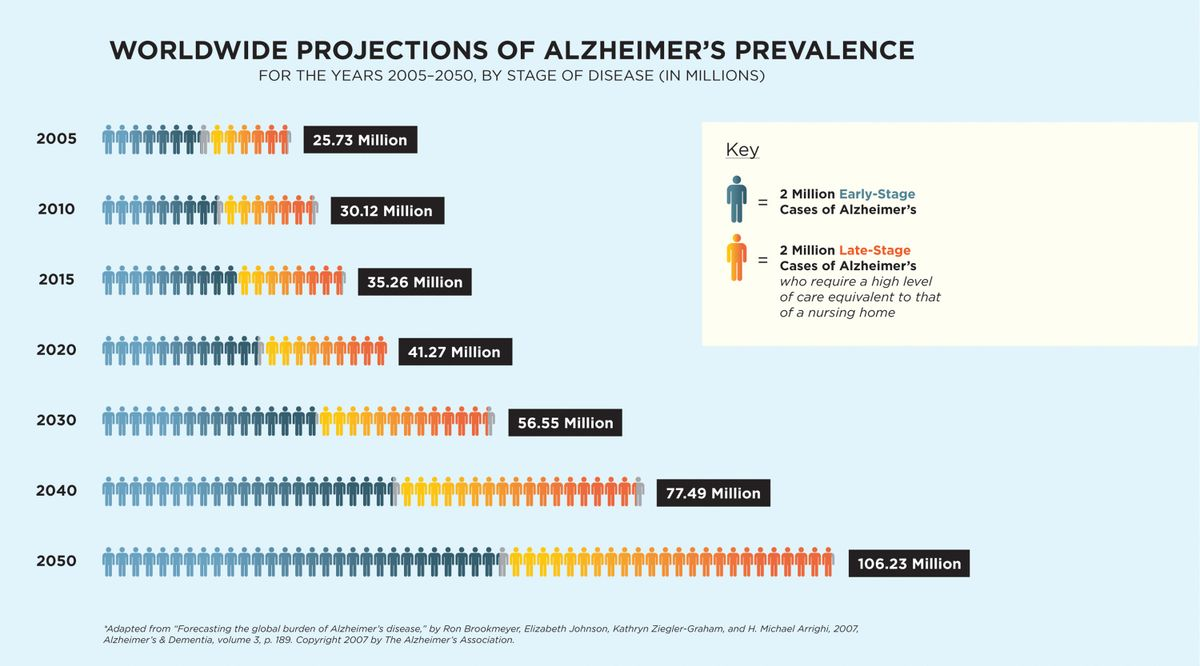

In [1]:
from IPython.display import Image
image_path = 'graphic.jpg'
Image(filename=image_path, width=700, height=500)

**Motivation:** The motivation behind choosing this problem comes from prior research I had done for health disparities in urban and rural locations and the need for health equity. Alzheimer's is a very prevalent disease that not only affects the individual but has a devastating toll on caregivers. This diseases' multifactoral etilogy and impact serves as a compelling case study to further explore demographics and health outcomes. By shedding light on this nuances relationship, I hope to uncover insights that can contribute to a broader discourse of the etiology and equitable practices.

For this project, I leveraged data from Centers for Disease Control and Prevention. National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health. Healthy Aging Data [online]. [last accessed Apr 14, 2024]. URL: https://www.cdc.gov/aging/agingdata/index.html. the dataset is renamed to 'alz.csv', and provides certain demographic information and other relevant variables. 

**Research Question: What is the prevalence of disparities in health outcomes such as disease prevention, or mortality rates among different demographic groups (age, gender, race/ethnicity) or geographic location, in relation to the disease of Alzheimer’s?”**

## Methodology

**Objective:** To outline the approach, models, and parameters for addressing the project's question.

**Exploratory Data Analysis:**

In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns

# Load the CSV into a DataFrame
df = pd.read_csv("alz.csv", usecols=['RowId', 'LocationDesc', 'Class', 'Data_Value_Type', 'Topic', 'Data_Value', 'Stratification1', 'Stratification2','YearEnd'])  # Reading CSV file into a DataFrame and selecting necessary columns
df.rename(columns={'Stratification1': 'Age Categories'}, inplace=True)  # Renaming stratification for age to just age category
print("\nColumns now:")
print(df.columns)  # Printing the column names of the DataFrame
dataset_length = len(df) #printing the length of the dataframe
print("\nLength of the Dataset:", dataset_length)


Columns now:
Index(['RowId', 'YearEnd', 'LocationDesc', 'Class', 'Topic', 'Data_Value_Type',
       'Data_Value', 'Age Categories', 'Stratification2'],
      dtype='object')

Length of the Dataset: 250937


In [3]:
# Defining a function that extracts sex information from a string
def get_sex(x):
    """
    Extract the sex from the given string.

    Args:
        x (str): The input string containing sex information.

    Returns:
        str or None: The extracted sex ('Male', 'Female') if found, otherwise None.
    """
    if 'Male' in str(x):  # Check if 'Male' is in the string
        return 'Male'  # Return 'Male' if found
    elif 'Female' in str(x):  # Check if 'Female' is in the string
        return 'Female'  # Return 'Female' if found
    else:
        return None  # Return None if neither 'Male' nor 'Female' is found

# Apply the get_sex function to create a new 'Sex' column in the DataFrame
df['Sex'] = df['Stratification2'].apply(get_sex)

# Define a function to extract race information from a string
def get_race(x):
    """
    Extract the race from the given string.

    Args:
        x (str): The input string containing race information.

    Returns:
        str or None: The extracted race if found, otherwise None.
    """
    if 'Male' not in str(x) and 'Female' not in str(x):  # Check if 'Male' or 'Female' is not in the string
        return x  # Return the string if it does not contain 'Male' or 'Female'
    else:
        return None  # Return None if 'Male' or 'Female' is found

# Apply the get_race function to create a new 'Race' column in the DataFrame
df['Race'] = df['Stratification2'].apply(get_race)

# Dropping the 'Stratification2' column from the DataFrame for better understanding
df.drop(columns=['Stratification2'], inplace=True)

# Print the first few rows of the DataFrame
print(df.head())

                                       RowId  YearEnd LocationDesc  \
0  BRFSS~2019~2019~9002~Q27~TMC03~AGE~GENDER     2019      Midwest   
1  BRFSS~2021~2021~9002~Q08~TOC01~AGE~GENDER     2021      Midwest   
2    BRFSS~2015~2015~9004~Q43~TOC11~AGE~RACE     2015         West   
3      BRFSS~2017~2017~21~Q27~TMC03~AGE~RACE     2017     Kentucky   
4    BRFSS~2021~2021~9003~Q43~TOC11~AGE~RACE     2021        South   

            Class                                            Topic  \
0   Mental Health                 Lifetime diagnosis of depression   
1  Overall Health  Physically unhealthy days (mean number of days)   
2  Overall Health                     Arthritis among older adults   
3   Mental Health                 Lifetime diagnosis of depression   
4  Overall Health                     Arthritis among older adults   

  Data_Value_Type  Data_Value     Age Categories   Sex                    Race  
0      Percentage        10.6  65 years or older  Male                    Non

In [4]:
# Filters the DataFrame to include only rows where the 'Class' column contains the string 'Cognitive Decline'.
df = df[df['Class'].str.contains('Cognitive Decline')]

# Filters the DataFrame to include only rows where the 'Data_Value_Type' column is 'Percentage'.
df = df[df['Data_Value_Type'] == 'Percentage']

# This line resets the index of the DataFrame after filtering to ensure the index is consecutive.
df.reset_index(drop=True, inplace=True)

# Check the updated DataFrame
print(df.head())
# Checking length of dataframe again
dataset_length = len(df)
print("\nLength of the Dataset:", dataset_length)

                                        RowId  YearEnd          LocationDesc  \
0     BRFSS~2016~2021~23~Q30~TCC01~AGE~GENDER     2021                 Maine   
1    BRFSS~2015~2015~11~Q30~TCC01~AGE~OVERALL     2015  District of Columbia   
2     BRFSS~2016~2021~9003~Q41~TCC03~AGE~RACE     2021                 South   
3     BRFSS~2018~2018~9002~Q41~TCC03~AGE~RACE     2018               Midwest   
4  BRFSS~2016~2021~9004~Q30~TCC01~AGE~OVERALL     2021                  West   

               Class                                              Topic  \
0  Cognitive Decline  Subjective cognitive decline or memory loss am...   
1  Cognitive Decline  Subjective cognitive decline or memory loss am...   
2  Cognitive Decline  Need assistance with day-to-day activities bec...   
3  Cognitive Decline  Need assistance with day-to-day activities bec...   
4  Cognitive Decline  Subjective cognitive decline or memory loss am...   

  Data_Value_Type  Data_Value Age Categories   Sex                 R

In [5]:
# This line extracts unique values from the 'LocationDesc' column of the DataFrame.
unique_locations = df['LocationDesc'].unique()

#Prints the unique locations extracted from the DataFrame.
print("Unique Locations:")
print(unique_locations)

Unique Locations:
['Maine' 'District of Columbia' 'South' 'Midwest' 'West' 'Washington'
 'Wyoming' 'Connecticut' 'Nebraska' 'Kentucky' 'Puerto Rico' 'Missouri'
 'South Dakota' 'Maryland' 'North Carolina' 'Georgia' 'Louisiana'
 'Florida' 'Arizona' 'Mississippi' 'Hawaii' 'Illinois' 'California'
 'United States, DC & Territories' 'New York' 'Minnesota' 'Michigan'
 'Idaho' 'Alaska' 'Vermont' 'New Jersey' 'Iowa' 'Tennessee' 'Colorado'
 'Indiana' 'Utah' 'Northeast' 'Arkansas' 'Delaware' 'Oregon' 'Wisconsin'
 'Montana' 'Ohio' 'Virginia' 'Kansas' 'Nevada' 'Oklahoma' 'Alabama'
 'Pennsylvania' 'Massachusetts' 'Rhode Island' 'New Mexico' 'Texas'
 'West Virginia' 'North Dakota' 'New Hampshire' 'South Carolina']


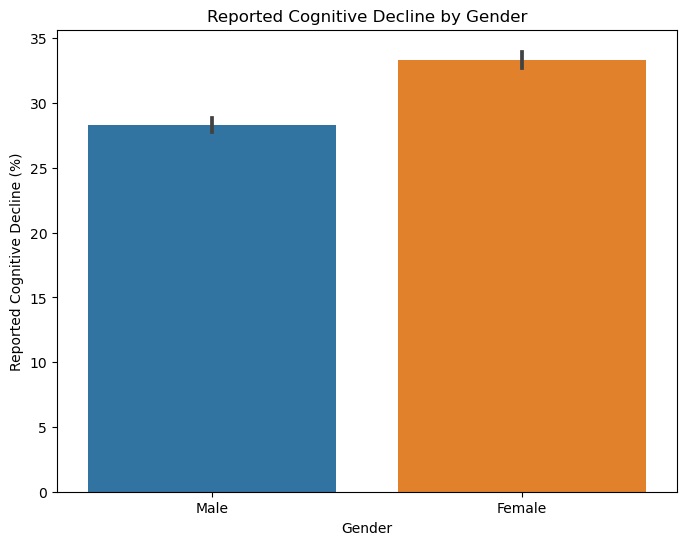

In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Creates a bar plot to visualize the average likelihood of cognitive decline based on gender.
plt.figure(figsize=(8, 6)) #setting figure size
sns.barplot(data=df, x='Sex', y='Data_Value', estimator=np.mean) #specifies dataframe, variables to represent on particular axis, and estimator to compute mean for categories
plt.title('Reported Cognitive Decline by Gender') #title name
plt.xlabel('Gender')  #label for x -axis
plt.ylabel('Reported Cognitive Decline (%)')  #label for y-axis
plt.show() #shows plot

The rationale behind creating this plot is to visually compare the average likelihood of cognitive decline between different genders. By presenting the data in a bar plot format, it allows for easy comparison and interpretation of the differences in cognitive decline likelihood among genders. This visualization helps in understanding any potential gender-based disparities in cognitive health. The importance of what is dispalyed in the graph will be discussed further later but as we can see there is an indication of one gender being higher than the other in the percentage of older adults who had reported subjective cognitive decline. 

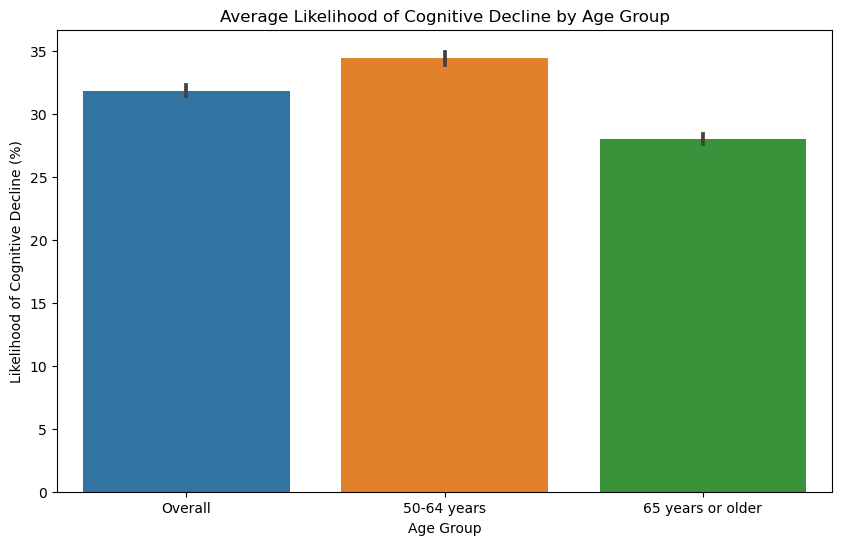

In [7]:
# Barplot for Age
plt.figure(figsize=(10, 6)) #setting figure size
sns.barplot(data=df, x='Age Categories', y='Data_Value') #specifies dataframe, variables to represent on particular axis, and estimator to compute mean for categories
plt.title('Average Likelihood of Cognitive Decline by Age Group') #title name
plt.xlabel('Age Group') #label for x -axis
plt.ylabel('Likelihood of Cognitive Decline (%)') #label for y -axis
plt.show()

This visualization helps in understanding how the likelihood of cognitive decline varies across different age categories, providing insights into potential age-related patterns in cognitive health. The data is quite limited in the way that it doesn't count different sections of age groups but rather two mains ones and one overall value.

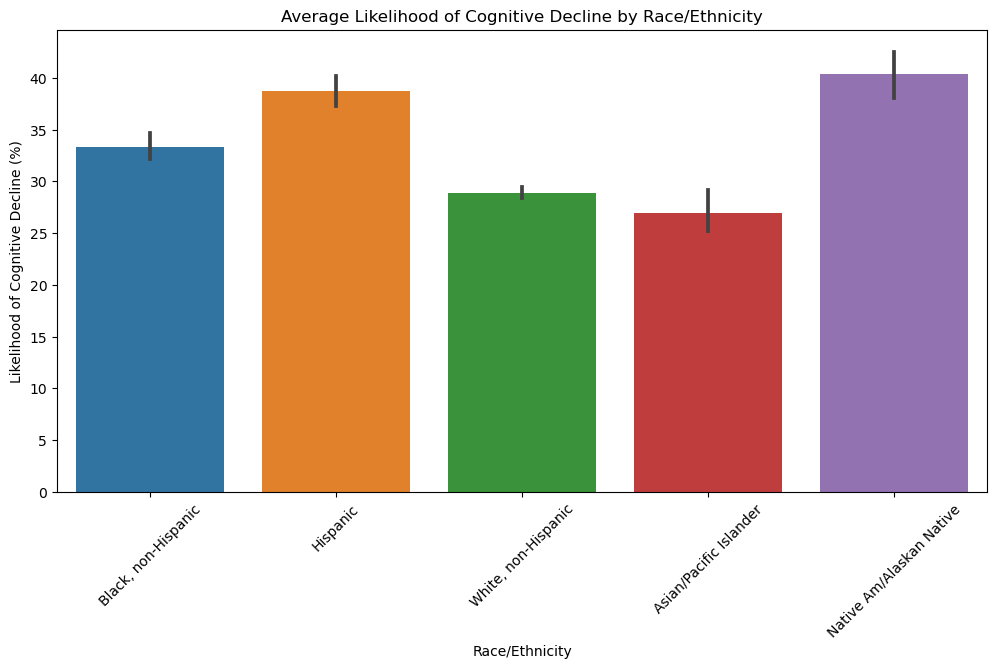

In [8]:
# Barplot for Race
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Race', y='Data_Value')
plt.title('Average Likelihood of Cognitive Decline by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Likelihood of Cognitive Decline (%)')
plt.xticks(rotation=45)
plt.show()

This visualization helps in understanding how the likelihood of cognitive decline varies among different racial or ethnic populations, providing insights into potential disparities in cognitive health across demographic groups. People of color have significantly reported more cognitive decline compared to the Caucasian demographic. 

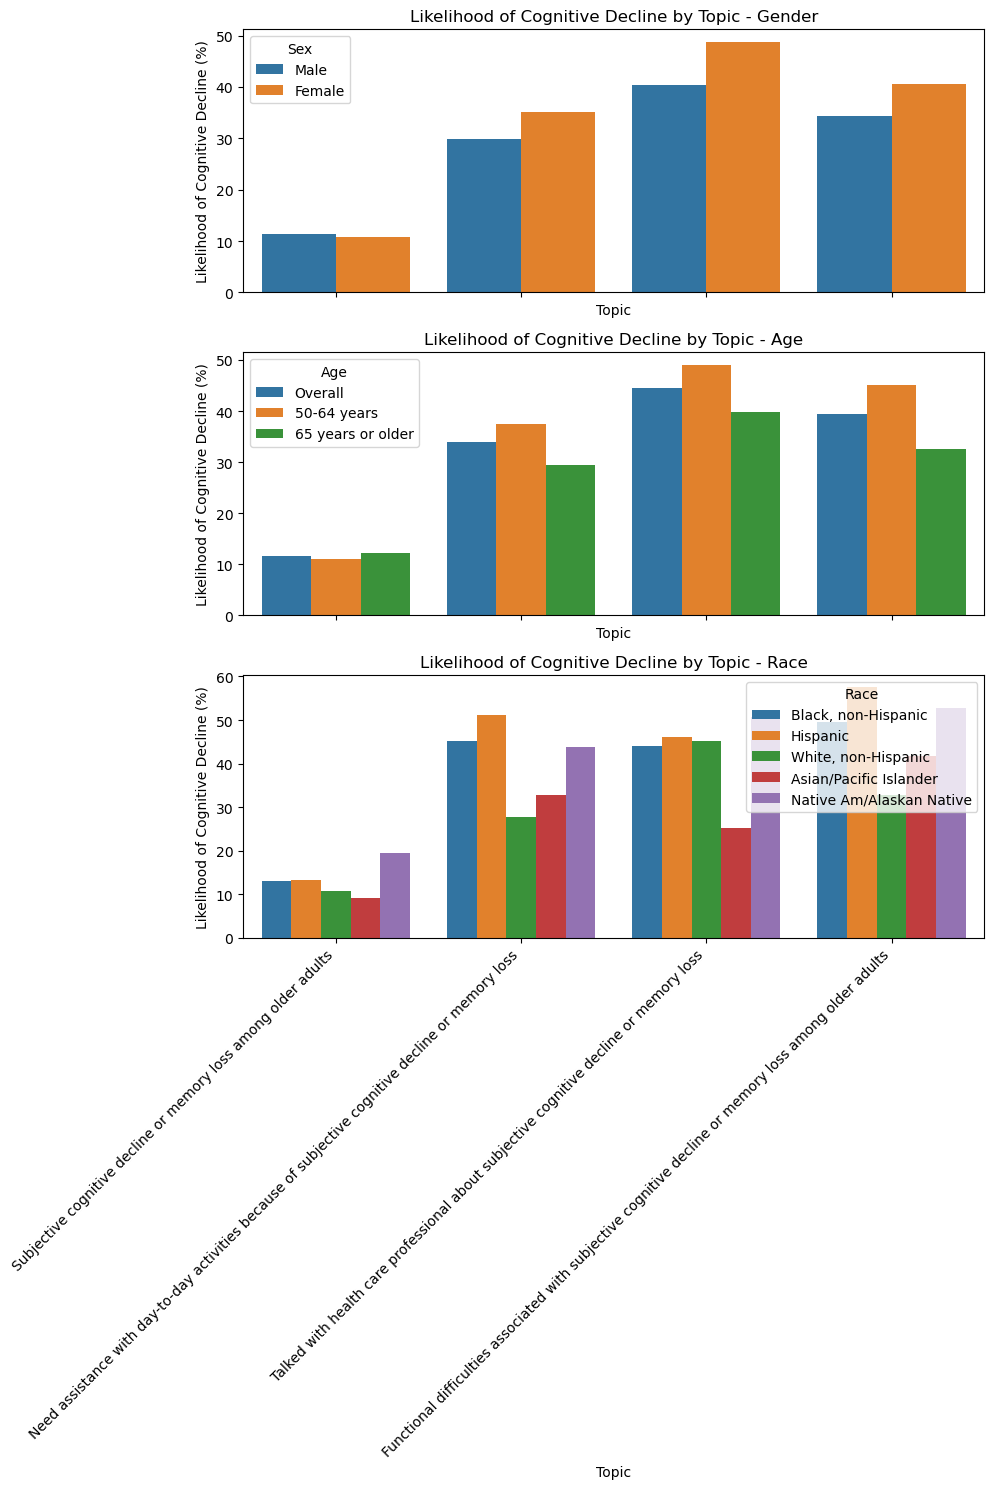

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with three subplots arranged vertically, all sharing the same x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Creating a bar plot for the likelihood of cognitive decline by topic, categorized by gender
sns.barplot(ax=axes[0], data=df, x='Topic', y='Data_Value', hue='Sex', ci=None)
axes[0].set_title('Likelihood of Cognitive Decline by Topic - Gender') #setting title
axes[0].set_ylabel('Likelihood of Cognitive Decline (%)') #setting y label
axes[0].legend(title='Sex') #making a legend for sex

# Creating a bar plot for the likelihood of cognitive decline by topic, categorized by age
sns.barplot(ax=axes[1], data=df, x='Topic', y='Data_Value', hue='Age Categories', ci=None)
axes[1].set_title('Likelihood of Cognitive Decline by Topic - Age') # Setting the title for second subplot
axes[1].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[1].legend(title='Age')

# Create a bar plot for the likelihood of cognitive decline by topic, categorized by race
sns.barplot(ax=axes[2], data=df, x='Topic', y='Data_Value', hue='Race', ci=None)
axes[2].set_title('Likelihood of Cognitive Decline by Topic - Race') # Setting the title for the third subplot
axes[2].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[2].legend(title='Race', loc='upper right') #Making sure the legend is in the upper right of the plot

# Rotating x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout() #preventing overlap of graphs
plt.show() #showing graphs

By categorizing this data together in the plot we can do the following: Understand demographic disparities, identify patterns and treends and compare different demograhic groups amoangst eachother. More specifically when we speak of cognitive decline we can see what participants in the study has selected for in Cognitive Decline, which are 4 major types. We can see the amount of men and women who have selected a partiuclar response within cognitive decline, as well as by race and their age.

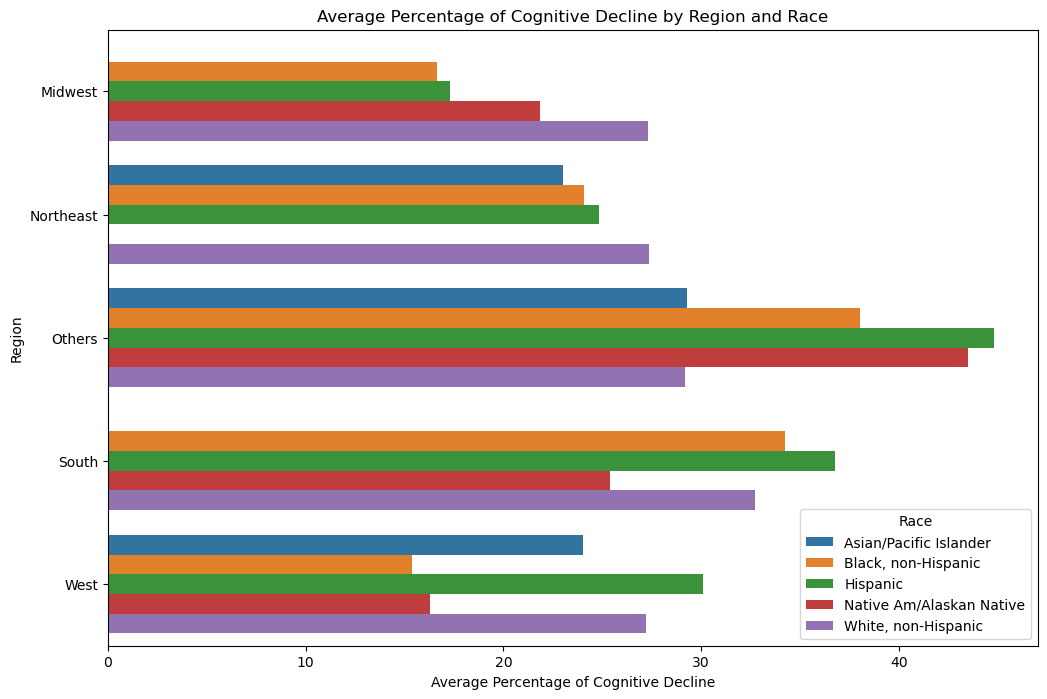

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the grouped regions from locations, i.e states going into particular regions
grouped_regions = {
    'Northeast': ['Maine', 'District of Columbia', 'Connecticut', 'Maryland', 'Massachusetts', 
                  'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
                'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 
              'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
              'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
             'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Others': ['Puerto Rico', 'United States, DC & Territories']
}

# Creating a reverse mapping dictionary to map states to their corresponding regions
reverse_region_mapping = {state: region for region, states in grouped_regions.items() for state in states}

# Mapping each location in the DataFrame to its corresponding region using the reverse mapping
df['Region'] = df['LocationDesc'].map(reverse_region_mapping)

# Calculate the average percentage of cognitive decline for each race within each region
average_race_data = df.groupby(['Region', 'Race'])['Data_Value'].mean().reset_index()

# Create a bar plot of the average data value for each race within each region
plt.figure(figsize=(12, 8))
sns.barplot(data=average_race_data, x='Data_Value', y='Region', hue='Race', orient='h')
plt.title('Average Percentage of Cognitive Decline by Region and Race')
plt.xlabel('Average Percentage of Cognitive Decline')
plt.ylabel('Region')
plt.legend(title='Race')
plt.show()

This code adds another variable into the percentage of reported cognitive decline form older adults: location. The survey was conducted in the United States, but rather than looking at all 50 individual states and other regions, we can group them into categories to effectively display our data. Overall, this code helps in analyzing and visualizing the average percentage of cognitive decline across different regions and racial or ethnic groups, providing insights into potential disparities and patterns in cognitive health outcomes. We see from this plot that Hispanic people and NativeAmerican/Alaskan NAtive make up the "Other" region and are also the highest in average percentage of cognitive decline compared to others.

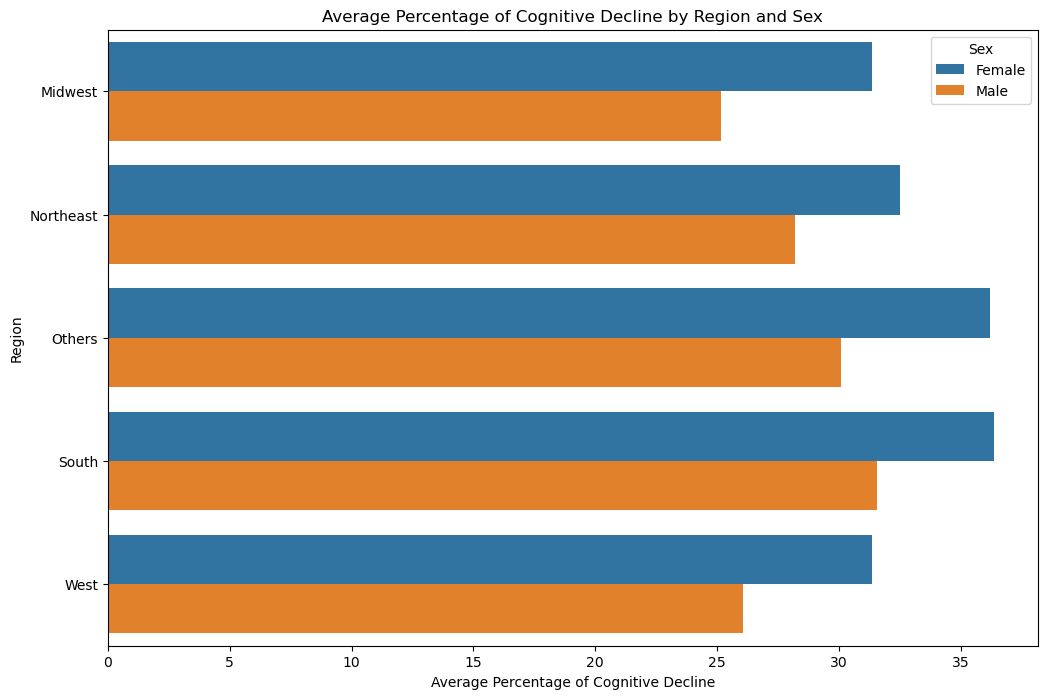

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the grouped regions from locations, i.e states going into particular regions
grouped_regions = {
    'Northeast': ['Maine', 'District of Columbia', 'Connecticut', 'Maryland', 'Massachusetts', 
                  'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
                'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 
              'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
              'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
             'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Others': ['Puerto Rico', 'United States, DC & Territories']
}

# Creating a reverse mapping of states to regions
reverse_region_mapping = {state: region for region, states in grouped_regions.items() for state in states}

# Map each location to its corresponding region
df['Region'] = df['LocationDesc'].map(reverse_region_mapping)

# Calculate the average percentage of cognitive decline for each sex within each region
average_sex_data = df.groupby(['Region', 'Sex'])['Data_Value'].mean().reset_index()

# Create a bar plot of the average data value for each sex within each region
plt.figure(figsize=(12, 8))
sns.barplot(data=average_sex_data, x='Data_Value', y='Region', hue='Sex', orient='h')
plt.title('Average Percentage of Cognitive Decline by Region and Sex')
plt.xlabel('Average Percentage of Cognitive Decline')
plt.ylabel('Region')
plt.legend(title='Sex')
plt.show()

Similar to the plot above, this reiterates the point of male and female disperison on loaction, and their relation to cognitive decline. The lines for females in each particular regions are longer than the lines for male. This plot also shows that in the Region named "Other" and the "South" it is high for the average oercentage of reported cognitive decline in older adults.

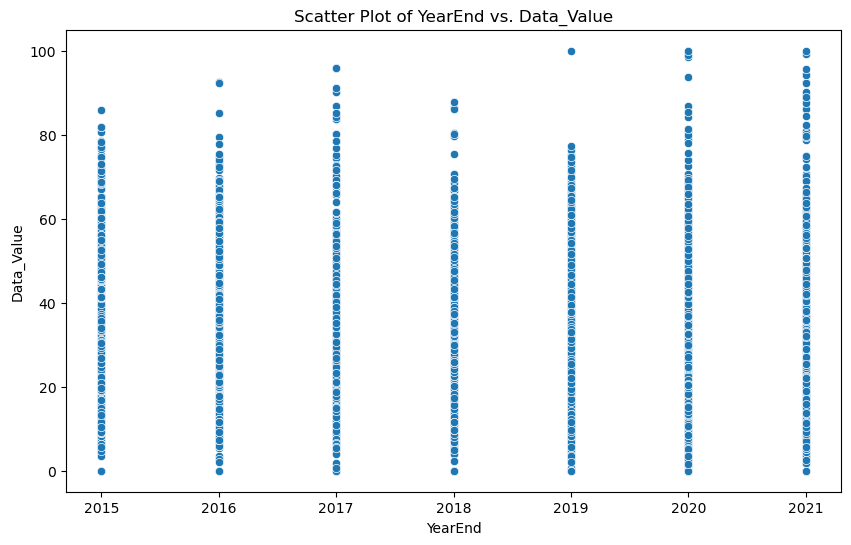

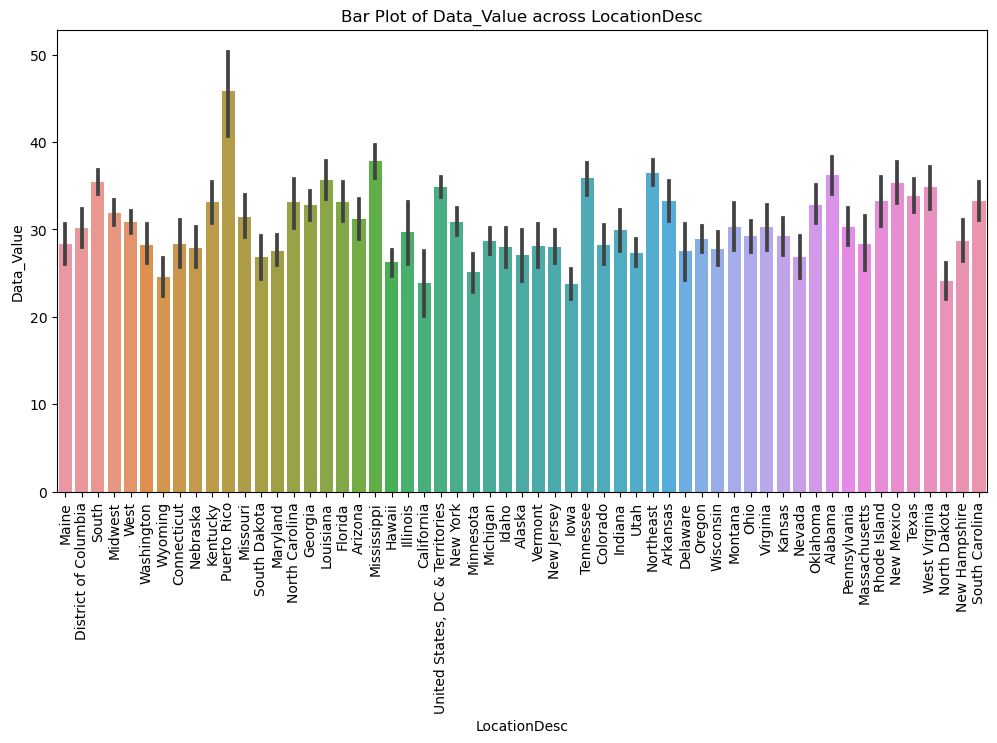

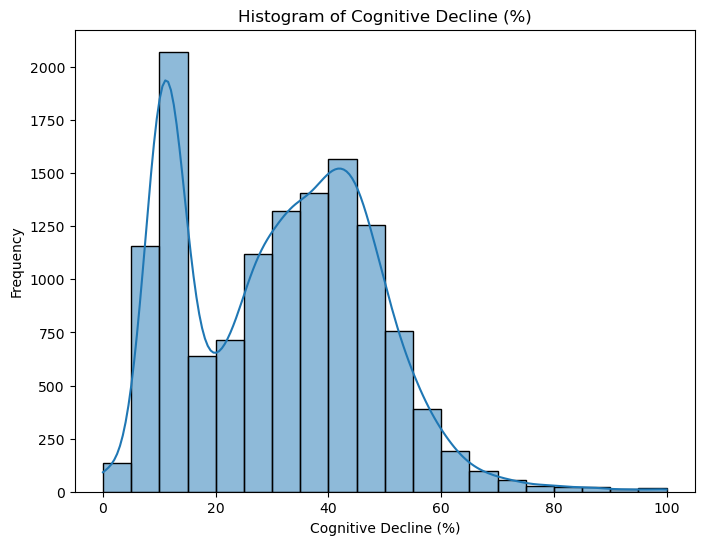

In [12]:
import matplotlib.pyplot as plt  # Importing the necessary library for creating plots
import seaborn as sns  # Importing seaborn for statistical data visualization

# Scatter Plot: YearEnd vs. Data_Value
plt.figure(figsize=(10, 6))  # Setting the size of the plot
sns.scatterplot(data=df, x='YearEnd', y='Data_Value')  # Creating a scatter plot
plt.title('Scatter Plot of YearEnd vs. Data_Value')  # Setting the title of the plot
plt.xlabel('YearEnd')  # Setting the label for the x-axis
plt.ylabel('Data_Value')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

# Bar Plot: Distribution of Data_Value across LocationDesc
plt.figure(figsize=(12, 6))  # Setting the size of the plot
sns.barplot(data=df, x='LocationDesc', y='Data_Value')  # Creating a bar plot
plt.title('Bar Plot of Data_Value across LocationDesc')  # Setting the title of the plot
plt.xlabel('LocationDesc')  # Setting the label for the x-axis
plt.ylabel('Data_Value')  # Setting the label for the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()  # Displaying the plot

# Histogram: Distribution of Data_Value
plt.figure(figsize=(8, 6))  # Setting the size of the plot
sns.histplot(data=df, x='Data_Value', bins=20, kde=True)  # Creating a histogram plot
plt.title('Histogram of Cognitive Decline (%)')  # Setting the title of the plot
plt.xlabel('Cognitive Decline (%)')  # Setting the label for the x-axis
plt.ylabel('Frequency')  # Setting the label for the y-axis
plt.show()  # Displaying the plot

Overall, these plots collectively help us gain insights into the patterns, trends, and distribution of cognitive decline rates within the dataset, facilitating further analysis and interpretation of the data.

## Results

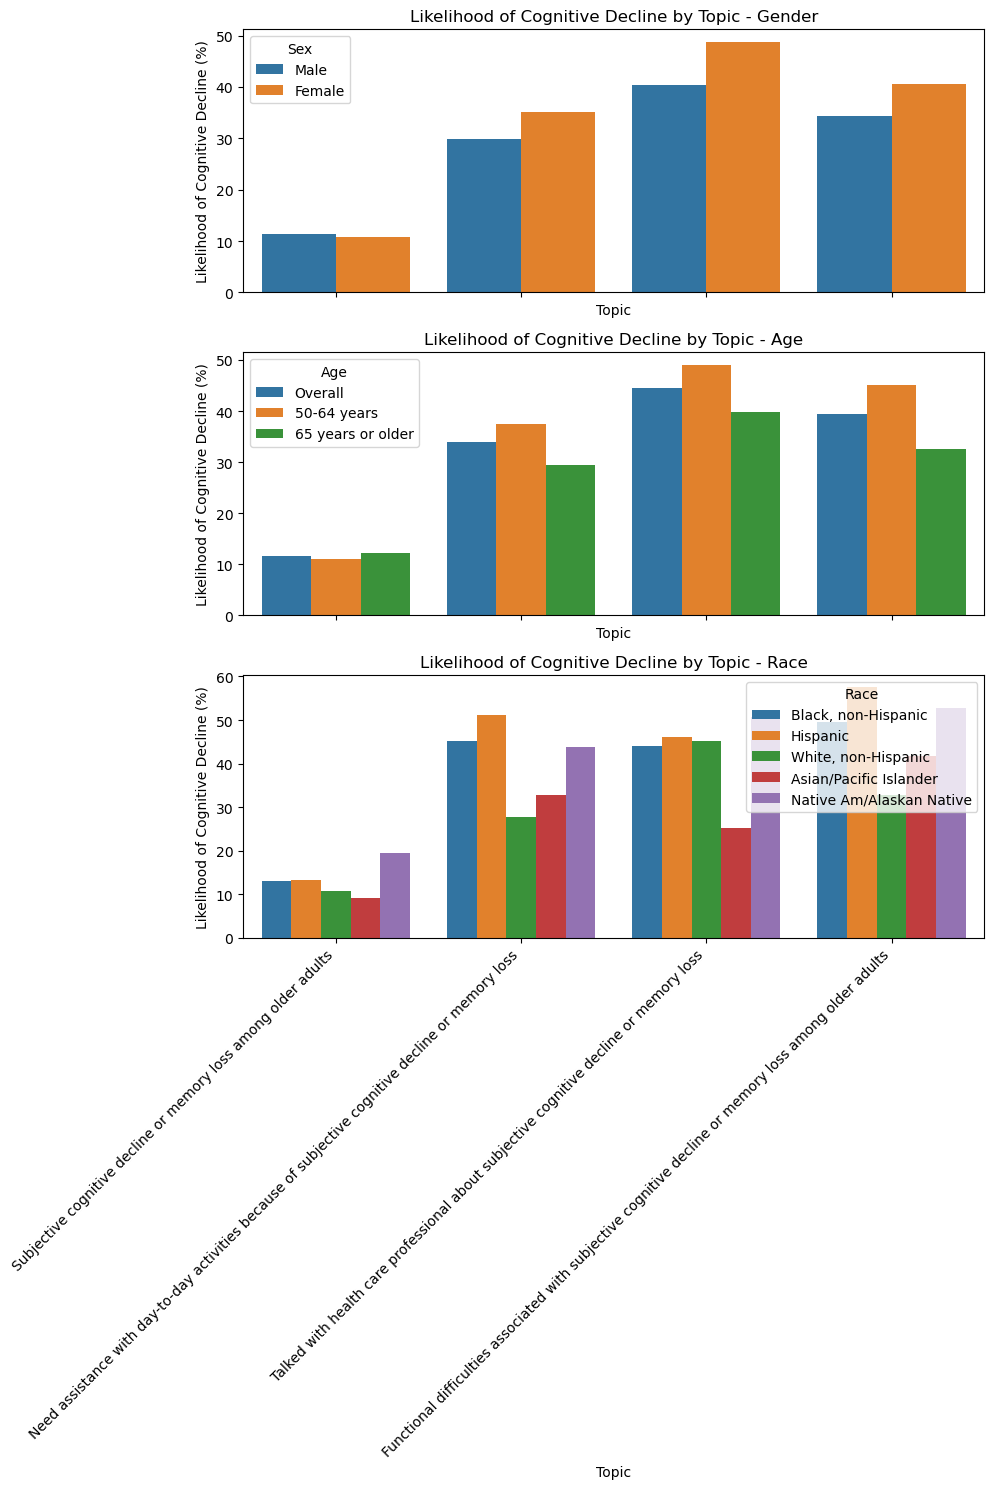

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a figure with three subplots arranged vertically, all sharing the same x-axis
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Creating a bar plot for the likelihood of cognitive decline by topic, categorized by gender
sns.barplot(ax=axes[0], data=df, x='Topic', y='Data_Value', hue='Sex', ci=None)
axes[0].set_title('Likelihood of Cognitive Decline by Topic - Gender') #setting title
axes[0].set_ylabel('Likelihood of Cognitive Decline (%)') #setting y label
axes[0].legend(title='Sex') #making a legend for sex

# Creating a bar plot for the likelihood of cognitive decline by topic, categorized by age
sns.barplot(ax=axes[1], data=df, x='Topic', y='Data_Value', hue='Age Categories', ci=None)
axes[1].set_title('Likelihood of Cognitive Decline by Topic - Age') # Setting the title for second subplot
axes[1].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[1].legend(title='Age')

# Create a bar plot for the likelihood of cognitive decline by topic, categorized by race
sns.barplot(ax=axes[2], data=df, x='Topic', y='Data_Value', hue='Race', ci=None)
axes[2].set_title('Likelihood of Cognitive Decline by Topic - Race') # Setting the title for the third subplot
axes[2].set_ylabel('Likelihood of Cognitive Decline (%)')
axes[2].legend(title='Race', loc='upper right') #Making sure the legend is in the upper right of the plot

# Rotating x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout() #preventing overlap of graphs
plt.show() #showing graphs

Analyzing the plot, it's evident that a wealth of information is conveyed. The initial observation from the first plot, which examines the breakdown by sex of reported cognitive decline percentages among older adults from 2015 to 2021, highlights a noteworthy trend: females consistently report cognitive decline more frequently than males. This observation extends to various facets; for instance, a higher proportion of women acknowledge subjective cognitive or memory loss compared to men. Moreover, women also indicate a greater need for assistance with daily activities due to cognitive impairment and report more functional difficulties than their male counterparts. What does this signify? Put simply, when considering sex as a demographic factor, women exhibit a higher likelihood of reporting cognitive decline, suggesting a greater propensity for Alzheimer's disease development compared to men. This finding is significant as cognitive decline serves as a key indicator of Alzheimer's disease progression. Possible reasons can range from the fact that women tend to live longer lives than men to genetics.

The age plot, which illustrates the average likelihood of cognitive decline by age group, clearly reveals a notable trend: individuals aged 50-64 report a higher incidence of cognitive decline compared to those aged 65 years or older. The data itself was conducted on older individuals as tehy are the oens with most cognitive decline. This observation suggests that middle-aged individuals, typically in the range of 50-64 years, may be experiencing cognitive decline at a more pronounced rate than older adults. Several factors could contribute to this disparity. Middle-aged individuals often juggle multiple responsibilities, such as career demands and caregiving obligations, which can lead to increased stress levels and cognitive strain. Moreover, lifestyle factors such as diet, exercise, and overall health may vary between these age groups, influencing cognitive health differently. Additionally, the onset of age-related cognitive decline may manifest earlier in some individuals, particularly those with genetic predispositions or underlying health conditions. Understanding these age-related patterns in cognitive decline is crucial for developing targeted interventions and support systems to mitigate cognitive decline risk, particularly among middle-aged populations who may be at higher risk than previously recognized.

Examining the plot concerning race and cognitive impairment provides valuable insights into the disparities in reported cognitive decline among different racial and ethnic groups. The visualization reveals variations in the average likelihood of cognitive decline across various racial and ethnic categories. Such disparities underscore the importance of considering socio-demographic factors in understanding cognitive health outcomes. By examining these disparities, researchers and healthcare professionals can identify vulnerable populations and tailor interventions and support services to address specific needs. Additionally, these findings can inform public health policies aimed at reducing health inequities and improving access to preventive care and cognitive health services for marginalized communities. Ultimately, by addressing these disparities, we can work towards achieving more equitable health outcomes for all individuals, regardless of race or ethnicity.

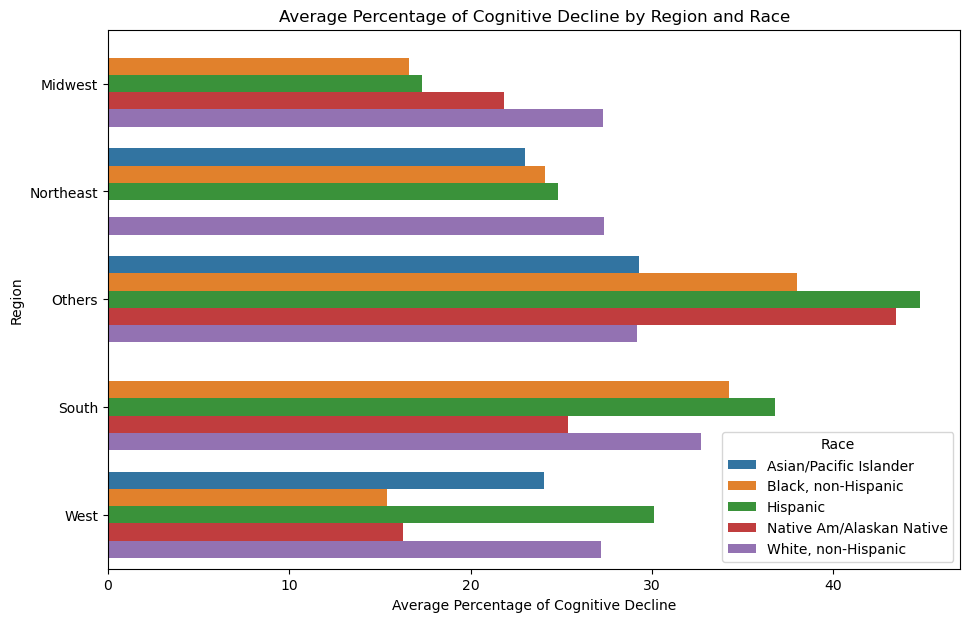

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the grouped regions from locations, i.e states going into particular regions
grouped_regions = {
    'Northeast': ['Maine', 'District of Columbia', 'Connecticut', 'Maryland', 'Massachusetts', 
                  'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
                'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 
              'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
              'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
             'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Others': ['Puerto Rico', 'United States, DC & Territories']
}

# Creating a reverse mapping dictionary to map states to their corresponding regions
reverse_region_mapping = {state: region for region, states in grouped_regions.items() for state in states}

# Mapping each location in the DataFrame to its corresponding region using the reverse mapping
df['Region'] = df['LocationDesc'].map(reverse_region_mapping)

# Calculate the average percentage of cognitive decline for each race within each region
average_race_data = df.groupby(['Region', 'Race'])['Data_Value'].mean().reset_index()

# Create a bar plot of the average data value for each race within each region
plt.figure(figsize=(11, 7))
sns.barplot(data=average_race_data, x='Data_Value', y='Region', hue='Race', orient='h')
plt.title('Average Percentage of Cognitive Decline by Region and Race')
plt.xlabel('Average Percentage of Cognitive Decline')
plt.ylabel('Region')
plt.legend(title='Race')
plt.show()

The graph indicates that racial and ethnic groups, particularly Black, Hispanic, or Native American/Alaskan Native individuals, report higher average percentages of cognitive decline compared to other groups. Notably, regions labeled as "Others" and the "South," which have higher proportions of people of color, exhibit the highest cognitive decline rates. These disparities highlight the influence of race and geographic location on cognitive health outcomes, underscoring the need for targeted interventions to address systemic inequalities and promote health equity.

This observation also underscores the intersectionality of race and geographic location in influencing cognitive health outcomes. Factors such as socioeconomic status, access to healthcare, environmental conditions, and systemic inequalities likely contribute to these disparities. Historically marginalized communities, including people of color, often face barriers to healthcare access, experience higher levels of stress due to discrimination and socioeconomic disadvantages, and may have limited access to resources that support cognitive health.

By acknowledging and addressing these disparities, we can strive towards improving cognitive health outcomes for all individuals, irrespective of race or location.

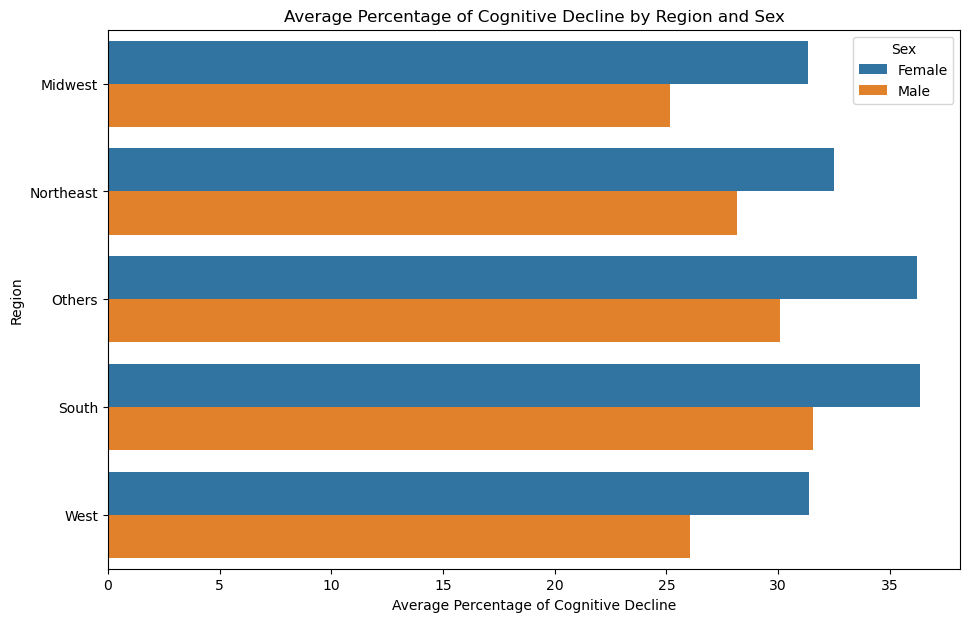

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the grouped regions from locations, i.e states going into particular regions
grouped_regions = {
    'Northeast': ['Maine', 'District of Columbia', 'Connecticut', 'Maryland', 'Massachusetts', 
                  'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 
                'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 
              'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 
              'Texas', 'Virginia', 'West Virginia'],
    'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
             'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    'Others': ['Puerto Rico', 'United States, DC & Territories']
}

# Creating a reverse mapping of states to regions
reverse_region_mapping = {state: region for region, states in grouped_regions.items() for state in states}

# Map each location to its corresponding region
df['Region'] = df['LocationDesc'].map(reverse_region_mapping)

# Calculate the average percentage of cognitive decline for each sex within each region
average_sex_data = df.groupby(['Region', 'Sex'])['Data_Value'].mean().reset_index()

# Create a bar plot of the average data value for each sex within each region
plt.figure(figsize=(11, 7))
sns.barplot(data=average_sex_data, x='Data_Value', y='Region', hue='Sex', orient='h')
plt.title('Average Percentage of Cognitive Decline by Region and Sex')
plt.xlabel('Average Percentage of Cognitive Decline')
plt.ylabel('Region')
plt.legend(title='Sex')
plt.show()

The graph reveals notable disparities in cognitive decline based on gender and geographic region. Across all regions, women consistently report higher average percentages of cognitive decline compared to men. Particularly, the "Others" and "South" regions exhibit the highest rates of cognitive decline, with women disproportionately affected in these areas. These findings underscore the significance of considering both gender and regional factors in understanding cognitive health disparities. By recognizing and addressing these differences, healthcare interventions can be tailored to better support individuals at higher risk of cognitive decline, ultimately promoting equitable health outcomes across diverse populations.

## Discussion and Conclusion

The analysis undertaken provided valuable insights into the association between demographic factors and cognitive decline, particularly highlighting disparities based on sex, age, and race across different regions. However, significant limitations were encountered due to the dataset's nature, which predominantly consisted of categorical variables rather than numerical ones. The inability to conduct a regression model over time was a notable constraint, as the year column held a singular value across many variables, resulting in plots appearing as vertical lines. Despite these challenges, the analysis shed light on how certain demographics are disproportionately affected by cognitive decline, offering potential explanations behind these disparities. Nevertheless, it became apparent that addressing the research question requires a more comprehensive dataset encompassing a wider range of variables and factors beyond sex, age, and race. Moving forward, it is imperative to exercise greater diligence in selecting datasets, ensuring they contain sufficient numerical data and encompass a broader spectrum of variables. Additionally, seeking out datasets with larger sample sizes and diverse sources could provide a more robust foundation for future analyses, thereby facilitating a deeper understanding of Alzheimer's disease and its multifaceted determinants. Datasets that conatin a variety of data rather than categorical ones would also result in valuable insights.

### References

ChatGPT, 4 April 3.5, OpenAI, 4 April 2024, chat.openai.com/chat.

“Alzheimer’s Disease and Healthy Aging Data.” Data.gov, Centers for Disease Control and Prevention, 24 May 2022, catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data.CDC. 

“Alzheimer’s Disease and Healthy Aging Data Portal.” Centers for Disease Control and Prevention, 9 Sept. 2019, www.cdc.gov/aging/agingdata/index.html.

What Is Alzheimer’s Disease? 2019, www.cdc.gov/aging/index.html.